In [22]:
%matplotlib inline

In [23]:
import torch
import torchvision
import torchvision.transforms as transforms

In [39]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.



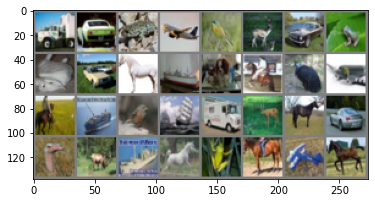

truck car   frog  plane bird  deer  car   frog  cat   car   horse ship  dog   horse bird  plane horse ship  bird  ship  truck deer  horse car   bird  deer  ship  horse frog  horse plane horse


In [40]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

2. Define a Convolutional Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [41]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [54]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(torch.cuda.is_available(), "/", torch.cuda.device_count(), "/", device)

True / 2 / cuda:0


In [43]:
print(torch.version.cuda)

11.3


In [45]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Single GPU Training

In [44]:
net.to(device)


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [46]:
for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')

print('Finished Training')

[1,   200] loss: 0.230
[1,   400] loss: 0.230
[1,   600] loss: 0.230
[1,   800] loss: 0.229
[1,  1000] loss: 0.228
[1,  1200] loss: 0.225
[1,  1400] loss: 0.214
[1,  1563] loss: 0.166
[2,   200] loss: 0.198
[2,   400] loss: 0.193
[2,   600] loss: 0.190
[2,   800] loss: 0.184
[2,  1000] loss: 0.180
[2,  1200] loss: 0.174
[2,  1400] loss: 0.169
[2,  1563] loss: 0.137
[3,   200] loss: 0.166
[3,   400] loss: 0.161
[3,   600] loss: 0.160
[3,   800] loss: 0.158
[3,  1000] loss: 0.158
[3,  1200] loss: 0.156
[3,  1400] loss: 0.156
[3,  1563] loss: 0.127
[4,   200] loss: 0.154
[4,   400] loss: 0.152
[4,   600] loss: 0.149
[4,   800] loss: 0.150
[4,  1000] loss: 0.149
[4,  1200] loss: 0.148
[4,  1400] loss: 0.146
[4,  1563] loss: 0.121
[5,   200] loss: 0.145
[5,   400] loss: 0.143
[5,   600] loss: 0.143
[5,   800] loss: 0.142
[5,  1000] loss: 0.140
[5,  1200] loss: 0.139
[5,  1400] loss: 0.138
[5,  1563] loss: 0.113
[6,   200] loss: 0.138
[6,   400] loss: 0.132
[6,   600] loss: 0.135
[6,   800] 

In [47]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

## Multi GPU Training

In [62]:
device = ['cuda:0','cuda:1']
parallel_net = nn.DataParallel(net, device_ids = device)

In [69]:
parallel_net.to('cuda')

DataParallel(
  (module): Net(
    (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (fc1): Linear(in_features=400, out_features=120, bias=True)
    (fc2): Linear(in_features=120, out_features=84, bias=True)
    (fc3): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [64]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = parallel_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')

print('Finished Training')

[1,   200] loss: 0.033
[1,   400] loss: 0.034
[1,   600] loss: 0.035
[1,   800] loss: 0.036
[1,  1000] loss: 0.036
[1,  1200] loss: 0.035
[1,  1400] loss: 0.035
[1,  1563] loss: 0.028
[2,   200] loss: 0.034
[2,   400] loss: 0.034
[2,   600] loss: 0.034
[2,   800] loss: 0.035
[2,  1000] loss: 0.034
[2,  1200] loss: 0.036
[2,  1400] loss: 0.035
[2,  1563] loss: 0.028
[3,   200] loss: 0.035
[3,   400] loss: 0.034
[3,   600] loss: 0.033
[3,   800] loss: 0.035
[3,  1000] loss: 0.034
[3,  1200] loss: 0.034
[3,  1400] loss: 0.036
[3,  1563] loss: 0.030
[4,   200] loss: 0.035
[4,   400] loss: 0.036
[4,   600] loss: 0.035
[4,   800] loss: 0.036
[4,  1000] loss: 0.036
[4,  1200] loss: 0.034
[4,  1400] loss: 0.034
[4,  1563] loss: 0.027
[5,   200] loss: 0.034
[5,   400] loss: 0.034
[5,   600] loss: 0.036
[5,   800] loss: 0.035
[5,  1000] loss: 0.035
[5,  1200] loss: 0.035
[5,  1400] loss: 0.035
[5,  1563] loss: 0.028
[6,   200] loss: 0.034
[6,   400] loss: 0.034
[6,   600] loss: 0.035
[6,   800] 

In [74]:
PATH = './cifar_para_net.pth'
torch.save(parallel_net.modules.state_dict(), PATH)

AttributeError: 'function' object has no attribute 'state_dict'

## Test Model Performance

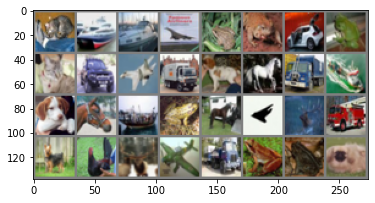

GroundTruth:  cat   ship  ship  plane


In [72]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

Next, let's load back in our saved model (note: saving and re-loading the model
wasn't necessary here, we only did it to illustrate how to do so):



In [77]:
PATH

'./cifar_para_net.pth'

In [81]:
{k.replace('module.', ''): v for k, v in torch.load(PATH).items()}

{'conv1.weight': tensor([[[[ 4.3224e-01,  3.0074e-01,  4.2779e-02, -8.6985e-02,  8.1410e-02],
           [ 3.3722e-01,  3.1450e-01,  3.5475e-01,  1.6653e-03, -1.0603e-02],
           [-3.8907e-02,  1.7209e-01,  1.8506e-01,  2.8668e-01,  4.9792e-02],
           [-1.8719e-01, -9.4491e-02,  2.2927e-01,  3.8204e-02,  1.2937e-01],
           [-2.6950e-01, -1.7238e-01, -1.0815e-01,  1.9967e-01,  3.0238e-01]],
 
          [[ 2.9623e-03, -7.0443e-02, -1.2803e-01, -3.3085e-01, -4.0139e-01],
           [-1.0511e-01,  1.4195e-01, -2.5145e-02, -1.2751e-01, -3.0605e-01],
           [-3.6000e-01, -4.5082e-03,  1.9306e-01,  7.7599e-02, -1.1652e-01],
           [-3.8910e-01, -1.2024e-01,  5.5101e-02,  4.6431e-02, -8.3634e-02],
           [-7.7041e-02, -2.8398e-01, -2.1212e-01,  8.4092e-02,  2.1346e-01]],
 
          [[ 3.4174e-01,  2.0772e-01,  5.4498e-02, -1.5258e-01,  1.2167e-01],
           [ 1.3441e-01,  2.7217e-01,  3.1881e-01,  9.8137e-02, -1.9307e-01],
           [-1.2607e-02,  8.2779e-02,  1.8

In [82]:
parallel_net = Net()
# parallel_net.load_state_dict(torch.load(PATH))
parallel_net.load_state_dict({k.replace('module.', ''): v for k, v in torch.load(PATH).items()})

<All keys matched successfully>

Okay, now let us see what the neural network thinks these examples above are:



In [83]:
outputs = parallel_net(images)

The outputs are energies for the 10 classes.
The higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [84]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  dog   ship  ship  ship 


The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [85]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = parallel_net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 61 %
